In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Predicting Stock Prices with LSTM and GRU

# 1. Use with LSTM

## Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Read file

In [46]:
# Path of csv data file
file_path = "/content/drive/MyDrive/AI_project/Predicting_Stock_Prices_with_LSTM_and_GRU/Dataset/TSLA.csv"

# Read file csv
df = pd.read_csv(file_path)

# Show
print(df)

            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        3.840000  25699000

In [47]:
# Information column
df.info()
# Size data
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


(2956, 7)

In [48]:
# Statistics such as min (minimum value), max (maximum value), mean (average value), std (standard deviation), and percentiles (25%, 50%, 75%)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


## 1.2. Data Visualization

In [49]:
# Moving Average Indicators
df['MA50'] = df['Close'].rolling(50).mean()
df['MA250'] = df['Close'].rolling(250).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA250
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN,NaN
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,NaN,NaN
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,NaN,NaN
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,NaN,NaN
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,NaN,NaN


In [50]:
days = df['Date']

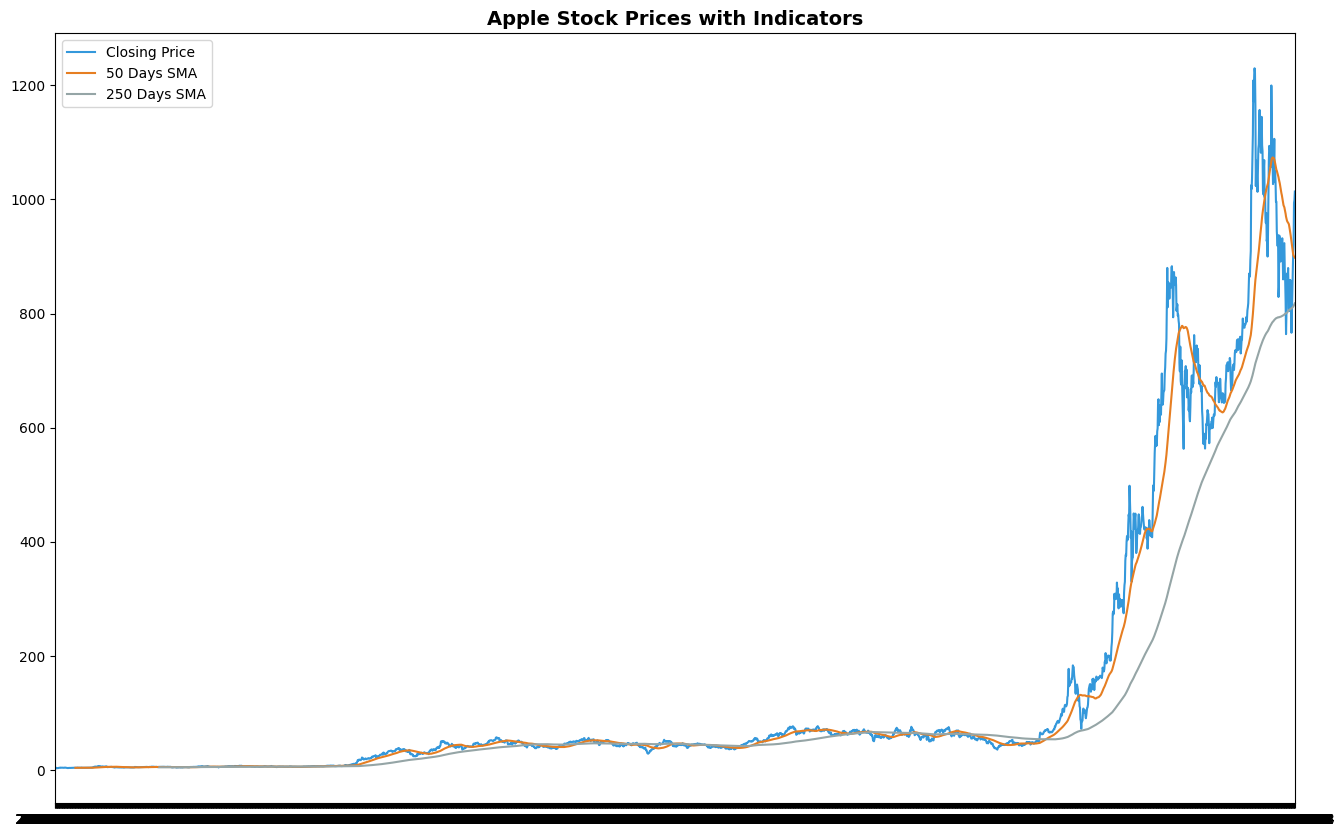

In [51]:
# Create a new image with set dimensions
plt.figure(figsize=(16,10))
# Draw a stock price graph
plt.plot(days, df['Close'], label="Closing Price", color="#3498db")
# Plot the 50-day moving average
plt.plot(days, df['MA50'], label="50 Days SMA", color="#e67e22")
# Plot the 50-day moving average
plt.plot(days, df['MA250'], label="250 Days SMA", color="#95a5a6")
# Set a title for the chart
plt.title("Apple Stock Prices with Indicators", fontsize=14, fontweight="semibold")
# Set x-axis limits
plt.xlim([days.min(), days.max()])
plt.legend()
# Show
plt.show()


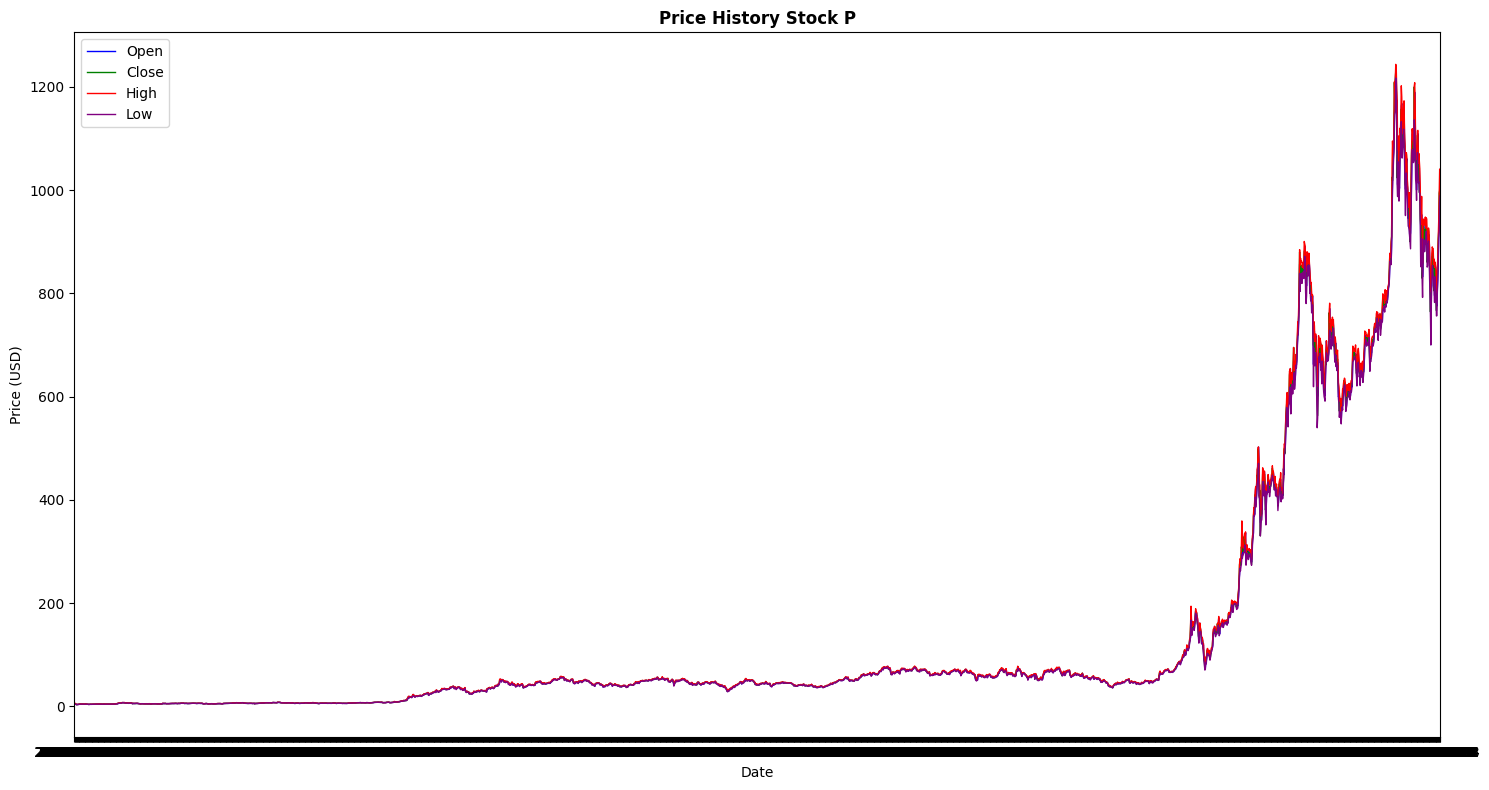

In [52]:

plt.figure(figsize=(15, 8))

# Draw a stock price chart over time
plt.plot(days, df['Open'], linestyle='-', color='blue', label='Open', linewidth=1)
plt.plot(days, df['Close'], linestyle='-', color='green', label='Close', linewidth=1)
plt.plot(days, df['High'], linestyle='-', color='red', label='High', linewidth=1)
plt.plot(days, df['Low'], linestyle='-', color='purple', label='Low', linewidth=1)

plt.title('Price History Stock P', fontweight="semibold")
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.xlim([days.min(), days.max()])
plt.legend()
plt.tight_layout()

plt.show()


## 1.3. Data preprocessing

In [53]:
target_data = df[['Close']]
target_data.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Normalize data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
target_data_sc   = scaler.fit_transform(target_data)

In [56]:
target_data_sc

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

## 1.4. Create training set and testing set

In [57]:
# Create training set

test_len  = 60
train_len = target_data_sc.shape[0] - test_len
timesteps = 60
features  = 1

X_train = []
y_train = []

for i in range(timesteps, train_len):
  X_train.append(target_data_sc[i-timesteps:i, :])
  y_train.append(target_data_sc[i, :])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)

(2836, 60, 1) (2836, 1)


In [58]:
# Create testing set

X_test = []
y_test = []

for i in range(train_len, target_data_sc.shape[0]):
  X_test.append(target_data_sc[i-timesteps:i, :])
  y_test.append(target_data_sc[i, :])

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(X_test.shape, y_test.shape)

# Reshaping
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_test.shape, y_test.shape)

(60, 60, 1) (60, 1)


## 1.5. Build model LSTM

In [59]:
from keras.models import Sequential
import matplotlib.dates as mdates
from keras.layers import Dense, LSTM,Dropout
from keras.optimizers import SGD

In [81]:
# Initialising the RNN
model_LSTM = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_LSTM.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1),activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(50, return_sequences = True, activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(50, return_sequences = True, activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(50, activation='tanh'))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(25))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1))


optimizer=SGD(learning_rate=0.01, momentum=0.9)

model_LSTM.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [82]:
model_LSTM.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
89/89 [==============================] - 21s 116ms/step - loss: 0.0044
Epoch 2/10
89/89 [==============================] - 11s 120ms/step - loss: 0.0026
Epoch 3/10
89/89 [==============================] - 11s 126ms/step - loss: 0.0020
Epoch 4/10
89/89 [==============================] - 11s 127ms/step - loss: 0.0021
Epoch 5/10
89/89 [==============================] - 11s 120ms/step - loss: 0.0019
Epoch 6/10
89/89 [==============================] - 9s 103ms/step - loss: 0.0016
Epoch 7/10
89/89 [==============================] - 11s 119ms/step - loss: 0.0017
Epoch 8/10
89/89 [==============================] - 10s 114ms/step - loss: 0.0016
Epoch 9/10
89/89 [==============================] - 12s 136ms/step - loss: 0.0018
Epoch 10/10
89/89 [==============================] - 12s 133ms/step - loss: 0.0015


In [83]:
y_pred_LSTM = model_LSTM.predict(X_test)
y_pred_LSTM = scaler.inverse_transform(y_pred_LSTM)
y_test_LSTM = scaler.inverse_transform(y_test)

2/2 [==============================] - 2s 29ms/step


## 1.6. Results of using LSTM model

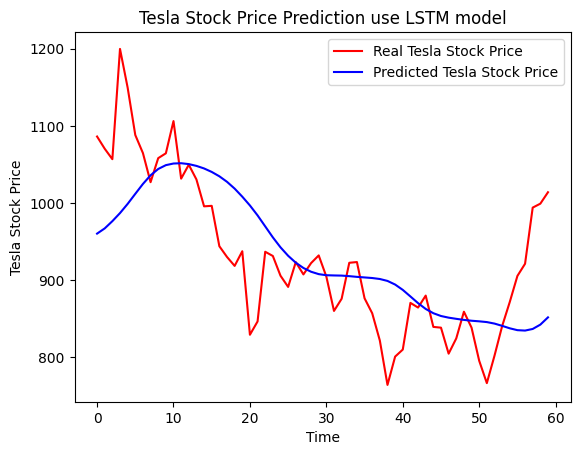

In [84]:
# Visualising the results
plt.plot(y_test_LSTM, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(y_pred_LSTM, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction use LSTM model')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

## 1.7. Evaluate LSTM model

In [85]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_LSTM - y_test_LSTM) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_LSTM - y_pred_LSTM) / y_test_LSTM))

print('Mean Absolute Percentage Error (MAPE):', mape)

Root Mean Squared Error: 76.59665207513821
Mean Absolute Percentage Error (MAPE): 0.06100045264889324


# 2. Use with GRU model

LSTM model provides short term prediction while GRU model predicts the medium term

## 2.1. Build GRU model

In [66]:
from keras.layers import GRU

In [67]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))
# Second GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Third GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Fourth GRU layer
model_GRU.add(GRU(50, activation='tanh'))
model_GRU.add(Dropout(0.2))
# The output layer
model_GRU.add(Dense(1))


In [68]:
optimizer=SGD(learning_rate=0.01, momentum=0.9)

In [69]:
# Compiling model
model_GRU.compile(optimizer= optimizer,loss='mean_squared_error')
# Fitting to the training set
model_GRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 12s 198ms/step - loss: 0.0326
Epoch 2/50
19/19 [==============================] - 4s 220ms/step - loss: 0.0168
Epoch 3/50
19/19 [==============================] - 5s 251ms/step - loss: 0.0054
Epoch 4/50
19/19 [==============================] - 4s 208ms/step - loss: 0.0014
Epoch 5/50
19/19 [==============================] - 4s 220ms/step - loss: 0.0012
Epoch 6/50
19/19 [==============================] - 5s 265ms/step - loss: 0.0014
Epoch 7/50
19/19 [==============================] - 4s 197ms/step - loss: 0.0012
Epoch 8/50
19/19 [==============================] - 4s 203ms/step - loss: 0.0012
Epoch 9/50
19/19 [==============================] - 6s 304ms/step - loss: 0.0012
Epoch 10/50
19/19 [==============================] - 4s 215ms/step - loss: 0.0012
Epoch 11/50
19/19 [==============================] - 4s 215ms/step - loss: 0.0011
Epoch 12/50
19/19 [==============================] - 7s 350ms/step - loss: 0.0012
Epoch 13/50
19/19 [=====

In [70]:
y_pred_GRU = model_GRU.predict(X_test)
y_pred_GRU = scaler.inverse_transform(y_pred_GRU)
y_test_GRU = scaler.inverse_transform(y_test)

2/2 [==============================] - 2s 29ms/step


## 2.2. Results of using GRU model

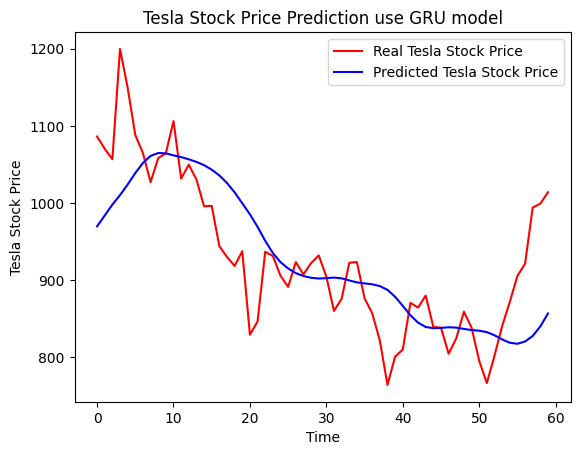

In [71]:
# Visualising the results
plt.plot(y_test_GRU, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(y_pred_GRU, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

## 2.3. Evaluate GRU model

In [72]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_GRU - y_test_GRU) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_GRU - y_pred_GRU) / y_test_GRU))

print('Mean Absolute Percentage Error (MAPE):', mape)

Root Mean Squared Error: 71.36877428905548
Mean Absolute Percentage Error (MAPE): 0.05630344428589583
